In [1]:
import sys
sys.path.append(rf"/Users/baia/Desktop/PYTHON/mba_dsa_usp_esalq")

from TCC.utils.constantes import *
import matplotlib.pyplot as plt

## Transaction Volume ETH and USDC

- Transaction volume: mensura o volume total movimentado em ETH e USDC na semana.

start_date: '2015-08-06'

In [ ]:
df_eth_onchain_metrics = pd.read_csv(rf"raw/2016_transactionVolume_ratioProfitLoss_holders_gasUsed_ethSpent.csv")
df_eth_onchain_metrics['Data_UTC'] = pd.to_datetime(df_eth_onchain_metrics['Date'], utc=True,).dt.strftime("%Y-%m-%d")
df_eth_onchain_metrics = df_eth_onchain_metrics.query("Data_UTC > '2015-08-06'")


df_base = df_eth_onchain_metrics.copy()
df_base = df_base.rename(columns={'Transaction Volume (ETH)':'transaction_volume_eth',
                                  'Transaction Volume USD (ETH)':'transaction_volume_usdc'
                                  })

df_base

In [ ]:
print("ETH on-chain features")
df_onchain_features = (
    df_base
    # 1. Garante que temos as colunas base necessárias
    # [['Data_UTC', 'transaction_volume_eth', 'transaction_volume_usdc', 'daily_onchain_trans_profit_to_loss_ratio', 'amount_of_holders_eth','gas_used_eth','eth_spent_over_time']]
)

df_base = df_onchain_features.copy()
df_base['Data_UTC'] = pd.to_datetime(df_onchain_features['Data_UTC'], utc=True,)#.dt.strftime("%Y-%m-%d")


# Visualizar as primeiras linhas
df_base#.dtypes

ETH on-chain features


,Date,transaction_volume_eth,transaction_volume_usdc,The Ratio of Daily On-Chain Transaction Volume in Profit to Loss (ETH),Total Amount Of Holders (ETH),Gas Used (ETH),Eth Spent Over Time (ETH),Data_UTC
344,2015-08-13T00:00:00.000Z,2.055004e+07,3.200790e+07,1.653202,1.321671e+04,5.038660e+08,4.150493e+06,2015-08-13 00:00:00+00:00
345,2015-08-20T00:00:00.000Z,3.717748e+06,4.964834e+06,1.161868,1.490529e+04,6.896795e+08,0.000000e+00,2015-08-20 00:00:00+00:00
346,2015-08-27T00:00:00.000Z,4.568682e+06,5.945409e+06,2.339618,1.606271e+04,8.701374e+08,9.000000e+05,2015-08-27 00:00:00+00:00
347,2015-09-03T00:00:00.000Z,3.001589e+06,3.787524e+06,0.799115,1.687671e+04,1.099880e+09,0.000000e+00,2015-09-03 00:00:00+00:00
348,2015-09-10T00:00:00.000Z,3.592569e+06,3.516760e+06,0.671084,1.770557e+04,1.131809e+09,6.000000e+05,2015-09-10 00:00:00+00:00
...,...,...,...,...,...,...,...,...
874,2025-10-09T00:00:00.000Z,2.837233e+07,1.159835e+11,0.917082,1.606726e+08,1.138235e+12,0.000000e+00,2025-10-09 00:00:00+00:00
875,2025-10-16T00:00:00.000Z,1.948265e+07,7.621770e+10,1.122699,1.614220e+08,1.137668e+12,1.600000e+05,2025-10-16 00:00:00+00:00
876,2025-10-23T00:00:00.000Z,1.977869e+07,7.919351e+10,2.167487,1.621754e+08,1.138940e+12,0.000000e+00,2025-10-23 00:00:00+00:00
877,2025-10-30T00:00:00.000Z,2.460757e+07,8.924180e+10,0.961909,1.629531e+08,1.138317e+12,0.000000e+00,2025-10-30 00:00:00+00:00


In [ ]:
df_eth_processed = (
    df_base
    .sort_values('Data_UTC')
    # .rename(columns={'Transaction Volume Over Time (ETH)': 'ETH_Vol_Raw'})
    
    # 1. Tratamento Logarítmico (Suaviza a escala exponencial)
    # Transforma "1 bilhão" e "100 milhões" em distâncias comparáveis estatisticamente
    .assign(ETH_Vol_Log = lambda df: np.log(df['transaction_volume_eth'] + 1)) # +1 evita erro log(0)
    
    # 2. Variação Diária (O pulso da atividade)
    # Positivo: A atividade na rede Ethereum está acelerando (Risco On)
    # Negativo: A atividade está esfriando (Possível volta pro BTC)
    .assign(ETH_Activity_Diff = lambda df: df['ETH_Vol_Log'].diff())
    
    # Seleção Final
    [['Data_UTC', 'ETH_Activity_Diff']]
)

df_eth_processed

,Data_UTC,ETH_Activity_Diff
344,2015-08-13 00:00:00+00:00,NaN
345,2015-08-20 00:00:00+00:00,-1.709744
346,2015-08-27 00:00:00+00:00,0.206107
347,2015-09-03 00:00:00+00:00,-0.420083
348,2015-09-10 00:00:00+00:00,0.179726
...,...,...
874,2025-10-09 00:00:00+00:00,0.098109
875,2025-10-16 00:00:00+00:00,-0.375890
876,2025-10-23 00:00:00+00:00,0.015081
877,2025-10-30 00:00:00+00:00,0.218449


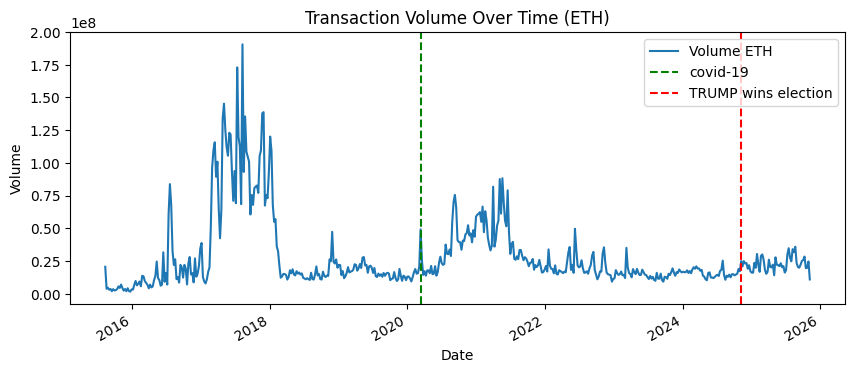

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_base['Data_UTC'], df_base['transaction_volume_eth'], label='Volume ETH')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.axvline(pd.to_datetime('2020-03-12'), color='green', linestyle='--', label='covid-19')
plt.axvline(pd.to_datetime('2024-11-06'), color='red', linestyle='--', label='TRUMP wins election')
plt.title('Transaction Volume Over Time (ETH)')
plt.legend()
plt.gcf().autofmt_xdate()   # rotaciona e formata os labels de data
plt.show()
